## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
# Getting info about the data in the group, landing_page and converted columns

print(df.group.value_counts(),end='\n\n')
print(df.landing_page.value_counts(),end='\n\n')
print(df.converted.value_counts(),end='\n\n')

treatment    147276
control      147202
Name: group, dtype: int64

new_page    147239
old_page    147239
Name: landing_page, dtype: int64

0    259241
1     35237
Name: converted, dtype: int64



b. Use the below cell to find the number of rows in the dataset.

In [5]:
print('number of rows : {}' \
      .format( df.shape[0] ))

number of rows : 294478


c. The number of unique users in the dataset.

In [6]:
print('number of unique users : {}' \
      .format( df.user_id.nunique() ))

number of unique users : 290584


d. The proportion of users converted.

In [7]:
print('proportion of users converted : {}' \
      .format( df.converted.value_counts(normalize=True)[1] ))

proportion of users converted : 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
mask_treatment_oldpage = (df['group'] =='treatment') & (df['landing_page'] =='old_page')
mask_control_newpage = (df['group'] =='control') & (df['landing_page'] =='new_page')
print('number of times the new_page and treatment don\'t line up. : {}' \
      .format( mask_treatment_oldpage.sum() + mask_control_newpage.sum() ))

number of times the new_page and treatment don't line up. : 3893


f. Do any of the rows have missing values?

In [9]:
print('number of rows with missing values : {}' \
      .format( df.isnull().sum().sum() ))

number of rows with missing values : 0


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df[(~mask_treatment_oldpage) & (~mask_control_newpage)].copy()
df2.sample(5)

,user_id,timestamp,group,landing_page,converted
121866,749305,2017-01-04 09:37:52.844564,treatment,new_page,0
210337,921667,2017-01-09 08:16:48.969336,control,old_page,0
6585,915148,2017-01-16 21:18:46.516568,control,old_page,0
152154,655294,2017-01-14 16:52:35.579722,treatment,new_page,0
36612,829013,2017-01-21 20:09:24.127875,treatment,new_page,0


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
print('number of unique users : {}' \
      .format( df2.user_id.nunique() ))

number of unique users : 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop_duplicates(subset='user_id',inplace=True)

In [16]:
# check removing the duplicated user_id

df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
print('probability of converting regardless of the page : {}' \
      .format( df2.converted.mean() ))

probability of converting regardless of the page : 0.11959708724499628


In [18]:
df2.groupby('group')['converted'].value_counts(normalize=True)

group      converted
control    0            0.879614
           1            0.120386
treatment  0            0.881192
           1            0.118808
Name: converted, dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
print('probability of converting in control group : {}' \
      .format( df2.loc[df['group']=='control','converted'].mean() ))

probability of converting in control group : 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
print('probability of converting in treatment group : {}' \
      .format( df2.loc[df['group']=='treatment','converted'].mean() ))

probability of converting in treatment group : 0.11880806551510564


d. What is the probability that an individual received the new page?

In [21]:
print('probability of receiving the new page : {}' \
     .format( df2['landing_page'].value_counts(normalize=True)['new_page'] ) )

probability of receiving the new page : 0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**NO , there are 50% chance to landing on the new page but the conversion rate for treatment group and control group are very close, So the new page has no such great impact for conversion**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis : conversion rate for the old page is greater than or equal the conversion rate for the new page.**
$$H_0: p_{old} >= p_{new}$$

**Alternative Hypothesis : conversion rate for the old page is less than the conversion rate for the new page.**
$$H_1: p_{old} < p_{new}$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
# assuming that is p_new and p_old are equal
# and they are equal to the converted rate in ab_data.csv regardless of the page
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
# assuming that is p_new and p_old are equal
# and they are equal to the converted rate in ab_data.csv regardless of the page
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [24]:
# number of users in treatment group (users with new_page)
n_new = df2[df2['group']=='treatment'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [25]:
# number of users in control group (users with old_page)
n_old = df2[df2['group']=='control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(n=1, p=p_new, size=n_new)
# new_page_converted[:50]

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.binomial(n=1, p=p_old, size=n_old)
# old_page_converted[:50]

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [45]:
new_page_converted.mean()-old_page_converted.mean()

0.00036283179949041233

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
p_diffs = list()
for _ in range(10000):
    new_page_converted = np.random.binomial(n=1, p=p_new, size=n_new)
    old_page_converted = np.random.binomial(n=1, p=p_old, size=n_old)
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())
    
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

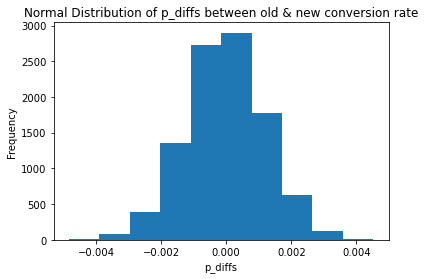

In [31]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Normal Distribution of p_diffs between old & new conversion rate');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
data_diffs_mean = df2.loc[df2['group']=='treatment','converted'].mean() - df2.loc[df2['group']=='control','converted'].mean()

(p_diffs > data_diffs_mean).mean()

0.9032

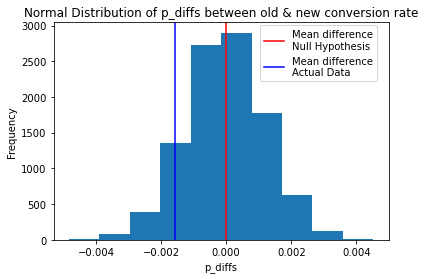

In [63]:
from textwrap import fill

plt.hist(p_diffs)

plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Normal Distribution of p_diffs between old & new conversion rate');

plt.axvline(p_diffs.mean(), color='red')
plt.axvline(data_diffs_mean, color='blue')
labels = ['Mean difference Null Hypothesis','Mean difference Actual Data']
plt.legend( [fill(l, 15) for l in labels], bbox_to_anchor=(0.6, 1.01));

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**About 90% of the difference between values generated from simulating the Null Hypothsis are greater than actual ones observed.**

**This value called p-value (The definition of a p-value is the probability of observing your statistic if the null hypothesis is true) and it helps to reject/fail to reject the null hypothesis.**

**High p-value means that average conversion with old_page are higher than new_page (we fail to reject the null hypothesis).**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
convert_old = df2[ (df2['landing_page']=='old_page') & (df2['converted'] == 1) ].shape[0]
convert_new = df2[ (df2['landing_page']=='new_page') & (df2['converted'] == 1) ].shape[0]
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_new = df2[df2['landing_page']=='new_page'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [35]:
# I edited the link for proportions_ztest function doc as the old one was broken.
from statsmodels.stats.proportion import proportions_ztest

count = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
z_stat, p_val = proportions_ztest(count, nobs, alternative='smaller')
z_stat, p_val

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **the z-score defined as how many std the values away from the mean.**
- **z-score means conversion rate for new_page is 1.3 std away from the old_page & p-value means that for alpha level of 5% (0.05) p-value > 0.05 so, we failed to reject the null hypothesis.**
- **Yes , they agree with the finding in the previous parts.**

**Resources:** \
helpful links used to interpret the meaning of z-score and p-value:
- [p-value](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/)
- [z-score](https://www.statisticshowto.com/probability-and-statistics/z-score/)
- [z-score](https://www.simplypsychology.org/z-score.html)

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**For predicting categorical variables with two possible outcomes we use logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
df2[['intercept','ab_page']] = 1
df2.loc[df2['group']=='control','ab_page'] = 0

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
import statsmodels.api as sm
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        07:17:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**the p-value associated with ab_page is 0.190 , p-value > 0.05 which means the association is not statistically significant and we failed to reject the null hypothesis**

**Hypotheses in part || was :**\
$$H_0: p_{old} >= p_{new} $$
$$H_1: p_{old} <  p_{new} $$

**Hypotheses in part ||| was :**\
$$H_0: p_{old} = p_{new} $$
$$H_1: p_{old} \neq p_{new} $$

**the p-value is different due to the different interpretation for the different hypotheses between part || and part ||| but they both don't support the alternative ones**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**it's good idea to add more independent variables like age or gender but it will introduce more complex to the model , make it hard to interpret the results and may lead to problems like Multi-collinearity (Multicollinearity is when we have predictor variables that are correlated with one another.)**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
df_new['country'].value_counts().sort_values()

CA     14499
UK     72466
US    203619
Name: country, dtype: int64

In [41]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new['intercept'] =  1
log_mod = sm.Logit(df_new['converted'], df_new[['intercept','UK','US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 24 Dec 2020   Pseudo R-squ.:               1.521e-05
Time:                        07:17:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**Conclusion**:
- the p-value associated with UK is 0.074 and US is 0.129
- p-values for independent variables > 0.05 which means the association is not statistically significant and country has no impact in conversion rate and we should reduce the model by removing terms one at a time**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] =  1
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK','US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 24 Dec 2020   Pseudo R-squ.:               2.323e-05
Time:                        07:17:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

- the p-value associated with ab_page is 0.190 ,UK is 0.07 and US is 0.13 
- p-values > 0.05 which means the association is not statistically significant and adding country will not lead to increase the conversion rate**

<a id='conclusions'></a>
## Conclusions

- There is no increase for conversion rate using new_page, we should stick with the old one.
- The probability, A/B test and logistic regression approachs failed to reject the null hypothsis (failed to get evidance that there is impact for the new page in increasing the user convert).
